National Parks Service Portfolio Project

TODO: 
1. Import neccesary libraries
2. Set up dataframes
3. Exploratory data analysis/cleaning
4. What is the distribution of conservation_status for animals? 
5. Are certain types of species more likely to be endangered? 
6. Are the differences between species and their conservation status significant?
7. Which species were spotted the most at each park?


In [13]:
#1. Importing neccessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',504)
pd.set_option('display.width',150)

In [14]:
#2. Set up Dataframe

species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [15]:
#3a.  Exploratory data analysis/cleaning for species df
#print(species.head())
print("--------------------------------------------------------------------------------------------------------------------")
#print(observations.head())

#how many different kinds of species? 
#print(len(species["scientific_name"].unique()))
#strange, length of species csv not counting the column name row is 5824, but the number of unique species in this list is much less than that
#print(species["scientific_name"].hasnans)
#no NaNs, maybe duplicates? yes duplicates
#Drop duplicating scientific names, those only vary between duplicating frames and regional common names dont matter

species = species.drop_duplicates(subset=["scientific_name"])
#print(species["scientific_name"].value_counts())

print(species.isna().sum())
print("--------------------------------------------------------------------------------------------------------------------")

species["conservation_status"].fillna(value ="Not Conserved", inplace=True)
print(species.isna().sum())
#TLDR: Removed duplicate values and filled every NaN in conservation status with a string explaining its not conserved


--------------------------------------------------------------------------------------------------------------------
category                  0
scientific_name           0
common_names              0
conservation_status    5363
dtype: int64
--------------------------------------------------------------------------------------------------------------------
category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


In [16]:
#3b Exploratory data analysis/cleaning for species df
print(observations.head())
print(observations.isna().sum())
print(observations.duplicated().sum())
observations.drop_duplicates(inplace=True)
print(observations.duplicated().sum())
#Observations dataframe seems to be clean

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
scientific_name    0
park_name          0
observations       0
dtype: int64
15
0


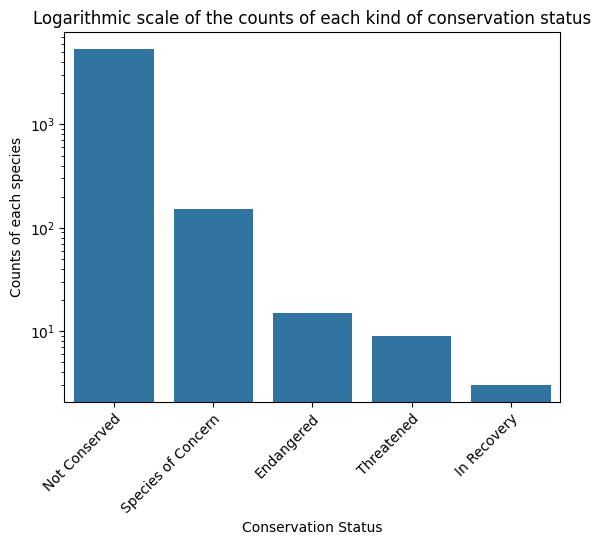

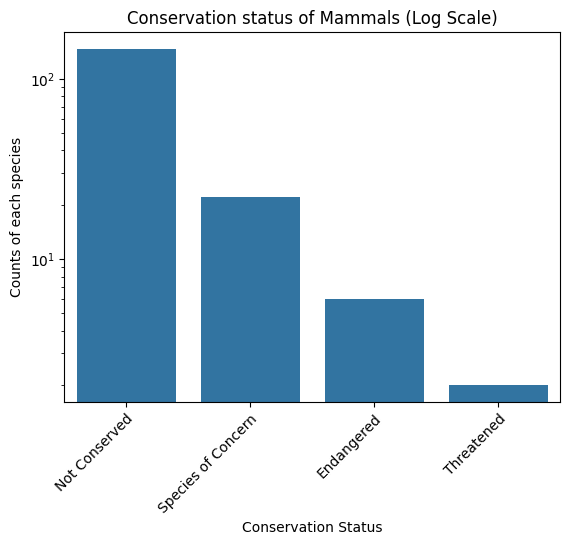

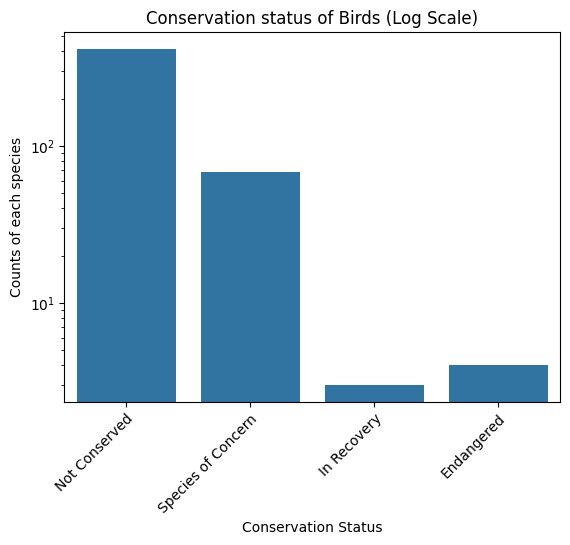

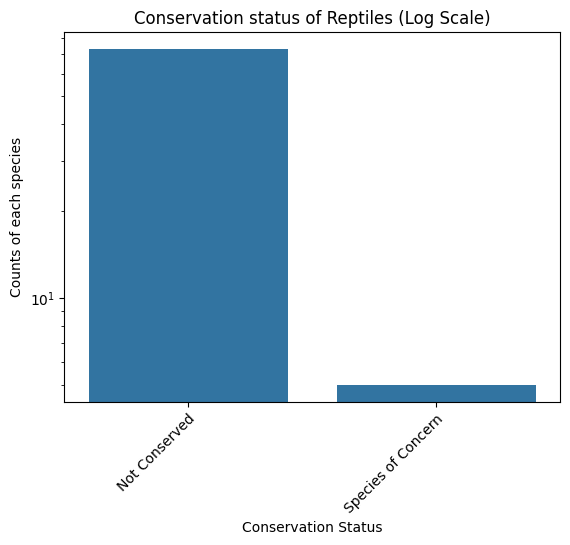

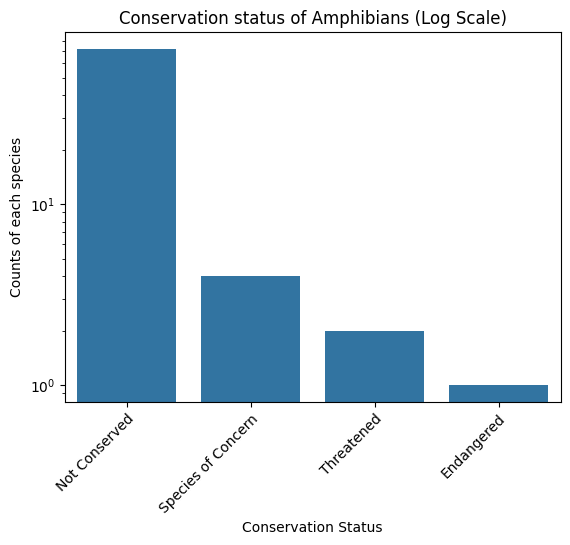

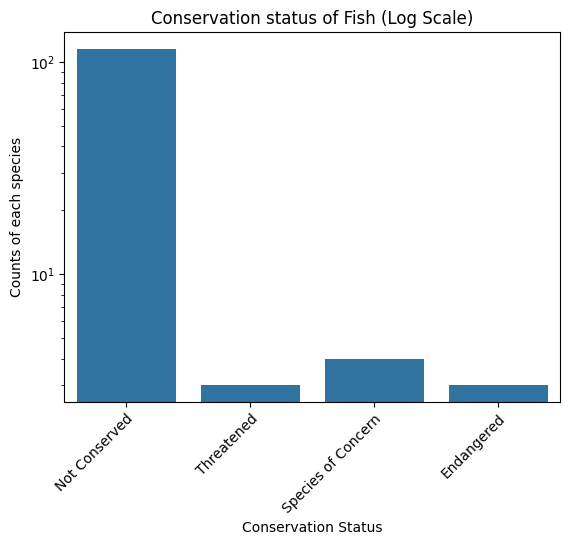

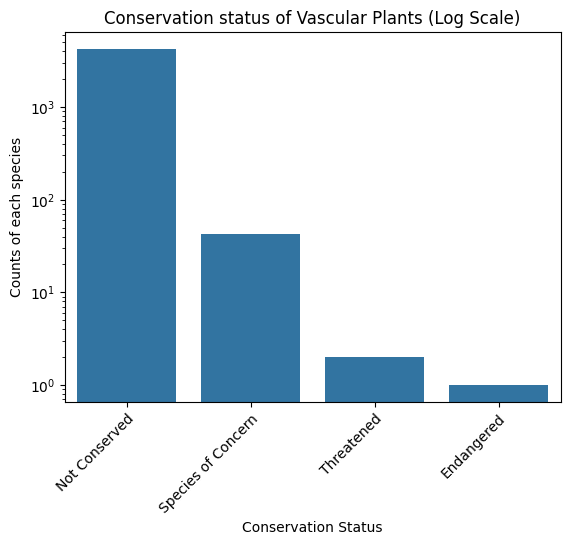

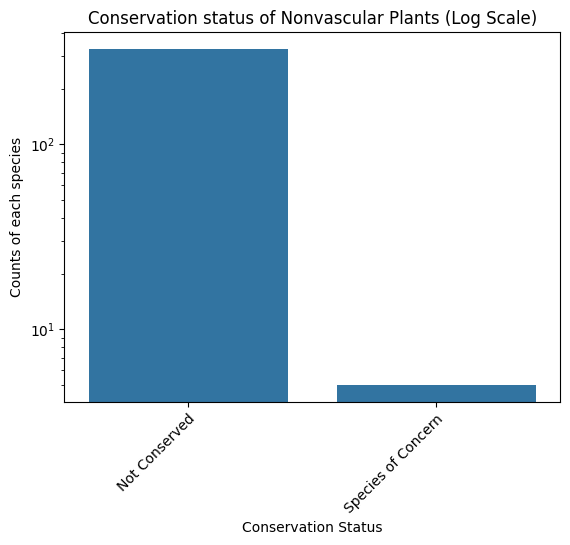

<Figure size 640x480 with 0 Axes>

In [25]:
#4. What is the distribution of conservation_status for animals? 

sns.countplot(data = species, x = "conservation_status")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title("Logarithmic scale of the counts of each kind of conservation status")
plt.xlabel("Conservation Status")
plt.yscale("log")
plt.ylabel("Counts of each species")
plt.show()
plt.clf()
for category in species["category"].unique(): 
    condition = (species["category"]==category)
    sns.countplot(data = species[condition], x = "conservation_status")
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    if category == "Fish":
        plt.title(f"Conservation status of {category} (Log Scale)")
    else:
        plt.title(f"Conservation status of {category}s (Log Scale)")
    plt.xlabel("Conservation Status")
    plt.yscale("log")
    plt.ylabel("Counts of each species")
    plt.show()
    plt.clf()
